In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# First read the uploaded data sheet or upload (sns.load_dataset("name the data set", example-sns.load_dataset("iris")) the data sheet
data=pd.read_csv("diabetes1.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Perform basic checks which is common for LR, Kmeans and here for logistic regression. the basic checks would include
# data.head(), tail, describe(), columns check, dtypes, info() for space, shape etc.

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# perform EDA (univariate-count plot, scatterplot, box plot), bivariate-hist plot, scatter plot, multivariate-pairplot etc and complete the outliers treatment. Outlier treatment can also be done during data preprocessing

In [ ]:
# for ploting similar plot of all column in one place use for loop
# to check the balance in the data outcome use value_counts. example data.column name.value_counts()

In [11]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Data Preprocessing

In [12]:
data.isnull().sum() # to check null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# Check duplicates and if more than remove
data.duplicated().sum()

0

In [16]:
# Check for the corrupted data-like in glucose level, BMI, skin thickness there values=0. which is not possible
# find the mean and median value for the column data["Column'].mean() Or data["Column"].median() and replace the corrupt values
# use mean if the data is normally distributed. else median. Median is safe. 
data["Glucose"].replace(0,data["Glucose"].median(), inplace=True)

In [19]:
data["BMI"].replace(0,data["BMI"].median(), inplace=True)
data["SkinThickness"].replace(0,data["SkinThickness"].median(), inplace=True)
data["Insulin"].replace(0,data["Insulin"].median(), inplace=True)

In [20]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,0,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [21]:
data.describe().T # Transpose rows and columns

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


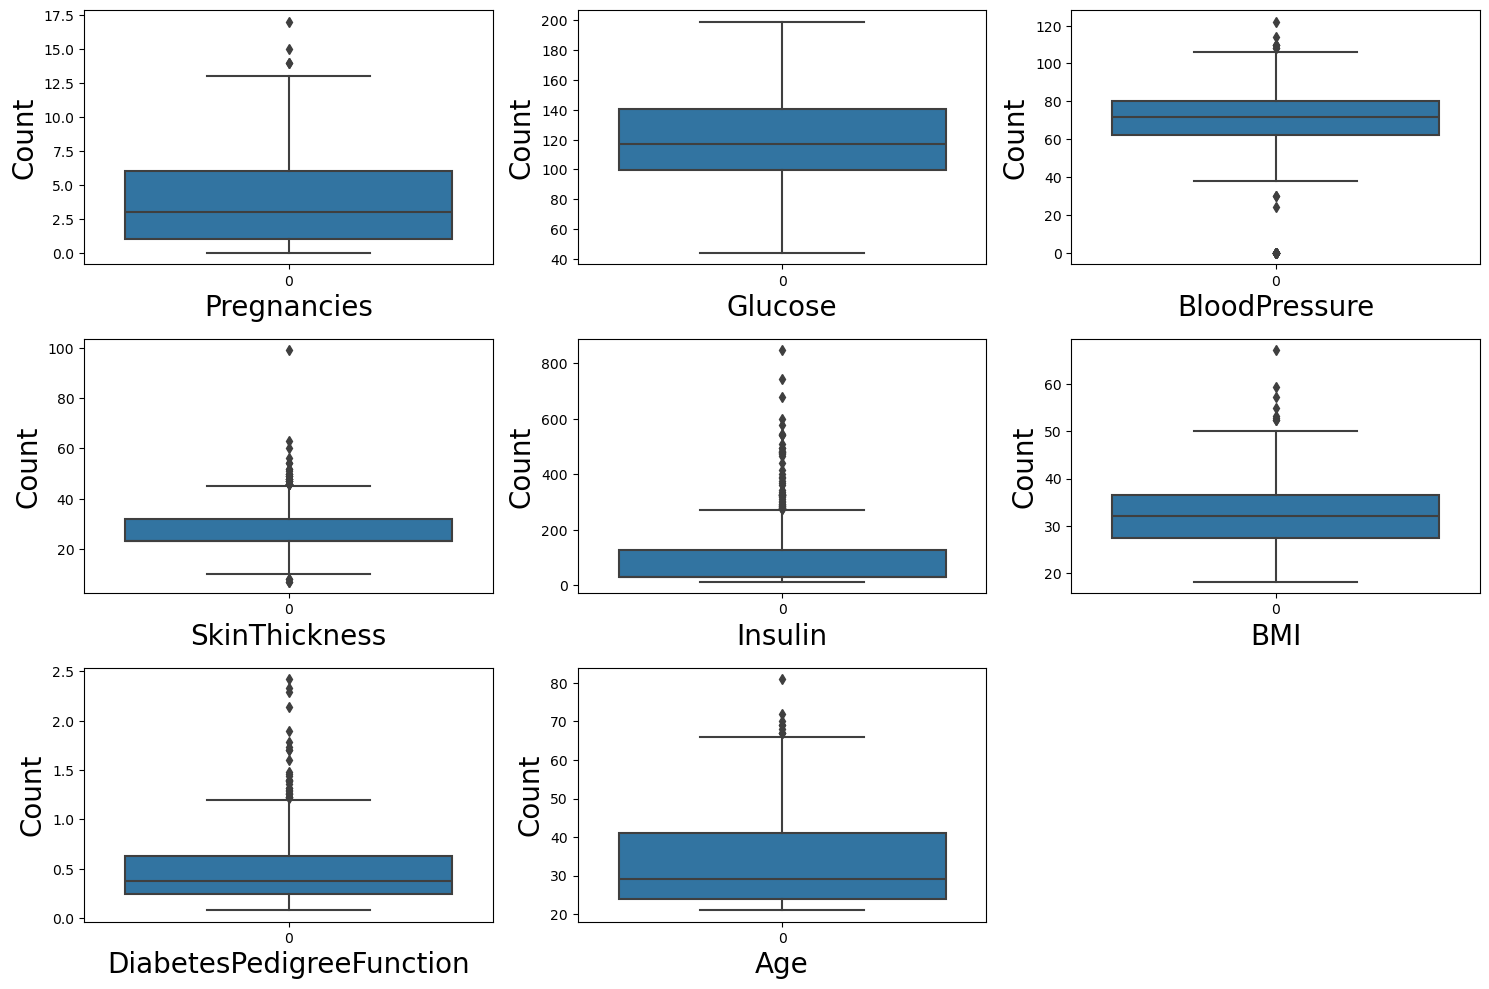

In [26]:
#  We can do outlier treatment here in ptrprocessing if not done earlier
# for outlier treatment we need to draw box plot
plt.figure(figsize=(15,10))

plotnumber=1
for column in data.drop("Outcome",axis=1):
    plt.subplot(3,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [ ]:
# Treatment of outliers
# draw the histplot to check the distribution if the distribution is normal use 3sigma rule else apply IQR


# IQR
## Interquartile Range (IQR): 
IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1
Lower Bound: 
Lower Bound
=
𝑄
1
−
1.5
×
IQR
Lower Bound=Q1−1.5×IQR
Upper Bou## nd: 
Upper Bound
=
𝑄
3
+
1.5
×
IQR
Upper Bound=Q3+1.5×IQR


In [ ]:
''''  import pandas as pd

# Step 1: Import the CSV file into a pandas DataFrame
data = pd.read_csv('path_to_your_file.csv')

# Step 2: Calculate Q1 and Q3 for the 'BMI' column
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)

# Step 3: Compute the IQR
IQR = Q3 - Q1

# Step 4: Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Identify outliers
outliers = data[(data['BMI'] < lower_bound) | (data['BMI'] > upper_bound)]

# Print the results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:\n", outliers)

# Optional: Treat outliers
# Option 1: Remove outliers
data_without_outliers = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]

# Option 2: Replace outliers with the median
median_bmi = data['BMI'].median()
data_treated = data.copy()
data_treated.loc[data['BMI'] < lower_bound, 'BMI'] = median_bmi
data_treated.loc[data['BMI'] > upper_bound, 'BMI'] = median_bmi

# Save the treated data to a new CSV file if needed
# data_without_outliers.to_csv('data_without_outliers.csv', index=False)
# data_treated.to_csv('data_treated.csv', index=False)

''''

In [ ]:
'''
z score- we can better use 3 sigma as in z score we need to create a separate column for storing the data
Explanation:
Step 1: Load the CSV file into a pandas DataFrame. Replace 'path_to_your_file.csv' with the actual path to your CSV file.
Step 2: Calculate the mean and standard deviation of the "BMI" column.
Step 3: Calculate the Z-scores for each data point in the "BMI" column and create a new column "Z_score_BMI" to store these values.
Step 4: Identify the outliers by filtering the DataFrame to find rows where the absolute value of the Z-score is greater than the threshold (commonly set to 3).
Optional Treatment: You can either remove the outliers or replace them with the mean value of the "BMI" column. The treated data can then be saved to a new CSV file if needed.
Using Z-scores is a standard method for identifying outliers, especially when the data is assumed to be normally distributed.
'''''

In [27]:
# replace outliers with mean as the distribution is normal, apply 3 sigma rule
data["BMI"].mean()

32.45091145833333

In [28]:
data["BMI"].median()

32.0

<Axes: xlabel='BMI', ylabel='Count'>

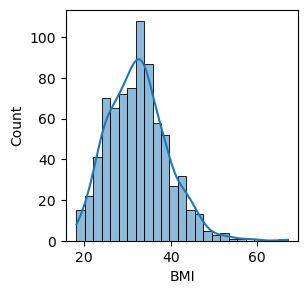

In [29]:
plt.figure(figsize=(3,3))
sns.histplot(data=data, x="BMI", kde=True)

In [31]:
# apply 3 sigma rule
#lower limit and upper limit level 
lower_limit=data["BMI"].mean()-3*data["BMI"].std()
upper_limit=data["BMI"].mean()+3*data["BMI"].std()
print(lower_limit, ",",upper_limit)

11.824812048409168 , 53.07701086825749


In [32]:
filtered_data = data.loc[data["BMI"] < lower_limit]

print(filtered_data)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [33]:
filtered_data1 = data.loc[data["BMI"] > upper_limit]

print(filtered_data1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
120            0      162             76             56    100.0  53.2   
125            1       88             30             42     99.0  55.0   
177            0      129            110             46    130.0  67.1   
445            0      180             78             63     14.0  59.4   
673            3      123            100             35    240.0  57.3   

     DiabetesPedigreeFunction  Age  Outcome  
120                     0.759   25        1  
125                     0.496   26        1  
177                     0.319   26        1  
445                     2.420   25        1  
673                     0.880   22        0  


In [41]:
#len(data)
#len(filtered_data1)
# % of the outliers=len(filtered_data1)/len(filtered_data1)*100
# if less than 5% do the outlier treatment else donot do

In [36]:
data.loc[data["BMI"] > upper_limit, "BMI"]=data["BMI"].median() # mean ad median are almost same

In [38]:
filtered_data1 = data.loc[data["BMI"] > upper_limit]

print(filtered_data1)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


# Scaling data-stdardization or normalization

In [ ]:
# Standardization
# Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
df=["Pregnancies", "Outcome"]
data1=scaling.fit_transform(data.drop(df, axis=1))

In [45]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.590164,0.304348,0.019832,0.443804,0.234415,0.483333
1,0.264516,0.540984,0.239130,0.019832,0.242075,0.116567,0.166667
2,0.896774,0.524590,0.173913,0.019832,0.146974,0.253629,0.183333
3,0.290323,0.540984,0.173913,0.096154,0.285303,0.038002,0.000000
4,0.600000,0.327869,0.304348,0.185096,0.717579,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.622951,0.445652,0.199519,0.423631,0.039710,0.700000
764,0.503226,0.573770,0.217391,0.019832,0.536023,0.111870,0.100000
765,0.496774,0.590164,0.173913,0.117788,0.230548,0.071307,0.150000
766,0.529032,0.491803,0.173913,0.019832,0.342939,0.115713,0.433333


In [56]:
df1=data[["Pregnancies", "Outcome"]]


In [59]:
data3=pd.concat([data2,df1], axis=1)
data3

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.590164,0.304348,0.019832,0.443804,0.234415,0.483333,6,1
1,0.264516,0.540984,0.239130,0.019832,0.242075,0.116567,0.166667,1,0
2,0.896774,0.524590,0.173913,0.019832,0.146974,0.253629,0.183333,8,1
3,0.290323,0.540984,0.173913,0.096154,0.285303,0.038002,0.000000,1,0
4,0.600000,0.327869,0.304348,0.185096,0.717579,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.622951,0.445652,0.199519,0.423631,0.039710,0.700000,10,0
764,0.503226,0.573770,0.217391,0.019832,0.536023,0.111870,0.100000,2,0
765,0.496774,0.590164,0.173913,0.117788,0.230548,0.071307,0.150000,5,0
766,0.529032,0.491803,0.173913,0.019832,0.342939,0.115713,0.433333,1,1


In [60]:
# for standard scaler
from sklearn.preprocessing import StandardScaler
scaling=MinMaxScaler()
df=["Pregnancies", "Outcome"]
data1=scaling.fit_transform(data.drop(df, axis=1))

In [62]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
df1=data[["Pregnancies", "Outcome"]]
data4=pd.concat([data2,df1],axis=1)
data4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.590164,0.304348,0.019832,0.443804,0.234415,0.483333,6,1
1,0.264516,0.540984,0.239130,0.019832,0.242075,0.116567,0.166667,1,0
2,0.896774,0.524590,0.173913,0.019832,0.146974,0.253629,0.183333,8,1
3,0.290323,0.540984,0.173913,0.096154,0.285303,0.038002,0.000000,1,0
4,0.600000,0.327869,0.304348,0.185096,0.717579,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.622951,0.445652,0.199519,0.423631,0.039710,0.700000,10,0
764,0.503226,0.573770,0.217391,0.019832,0.536023,0.111870,0.100000,2,0
765,0.496774,0.590164,0.173913,0.117788,0.230548,0.071307,0.150000,5,0
766,0.529032,0.491803,0.173913,0.019832,0.342939,0.115713,0.433333,1,1
